In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset=pd.read_csv(r"C:\Users\zabiz\Downloads\Data_Science\Task4/Advertising.csv")
dataset

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
dataset = dataset.iloc[:, 1:]


In [4]:
dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
dataset.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

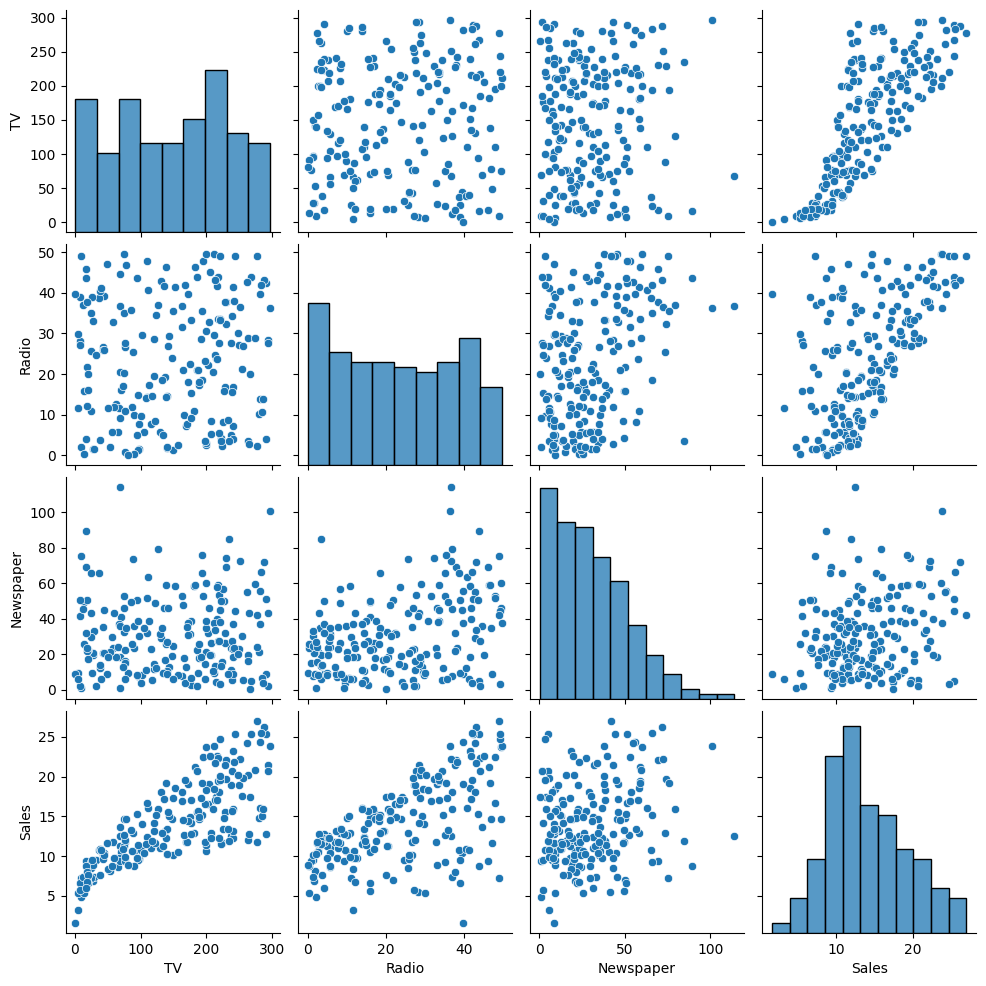

In [6]:
sns.pairplot(data=dataset)
plt.show()

In [7]:
x=dataset.iloc[:,:-1]
y=dataset["Sales"]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test =train_test_split(x,y, test_size=0.4, random_state=14)

In [10]:
from sklearn.ensemble import RandomForestRegressor

In [11]:
rg=RandomForestRegressor()
rg.fit(x_train,y_train)
rg

RandomForestRegressor()

In [12]:
rg.score(x_test,y_test)*100

97.07522841920192

In [13]:
y_pred =rg.predict([[38.9	,8.7	,18.8]])
y_pred

C:\Users\zabiz\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([8.87])

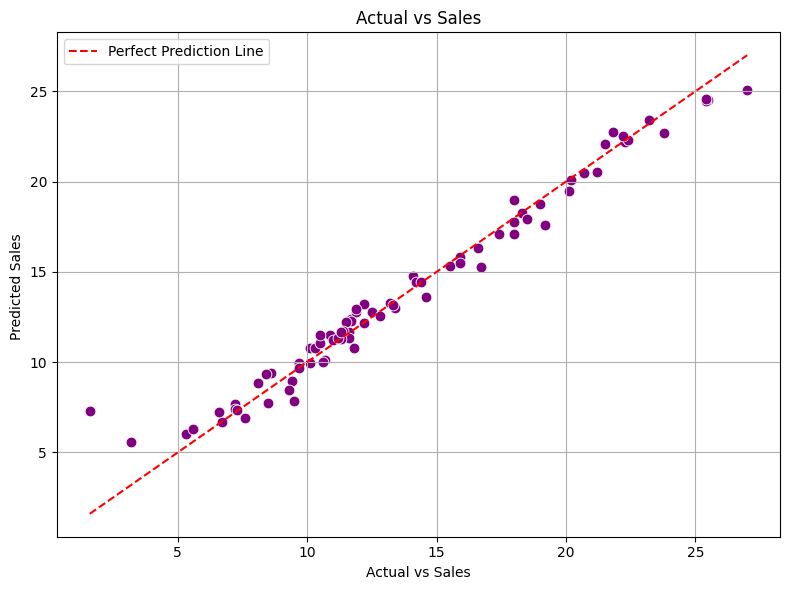

In [14]:
y_pred = rg.predict(x_test)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="purple", s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel("Actual vs Sales")
plt.ylabel("Predicted Sales ")
plt.title("Actual vs Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


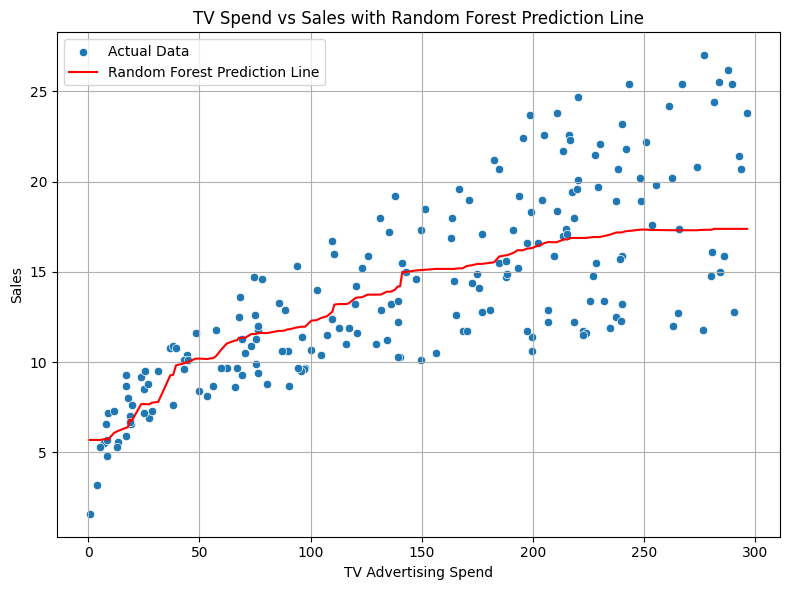

In [15]:
sorted_tv = np.sort(dataset['TV'].values)
radio_avg = dataset['Radio'].mean()
news_avg = dataset['Newspaper'].mean()

X_sorted = pd.DataFrame({
    'TV': sorted_tv,
    'Radio': radio_avg,
    'Newspaper': news_avg
})


sorted_predictions = rg.predict(X_sorted)


plt.figure(figsize=(8, 6))
sns.scatterplot(x='TV', y='Sales', data=dataset, label='Actual Data')
plt.plot(sorted_tv, sorted_predictions, color='red', label='Random Forest Prediction Line')
plt.xlabel("TV Advertising Spend")
plt.ylabel("Sales")
plt.title("TV Spend vs Sales with Random Forest Prediction Line")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


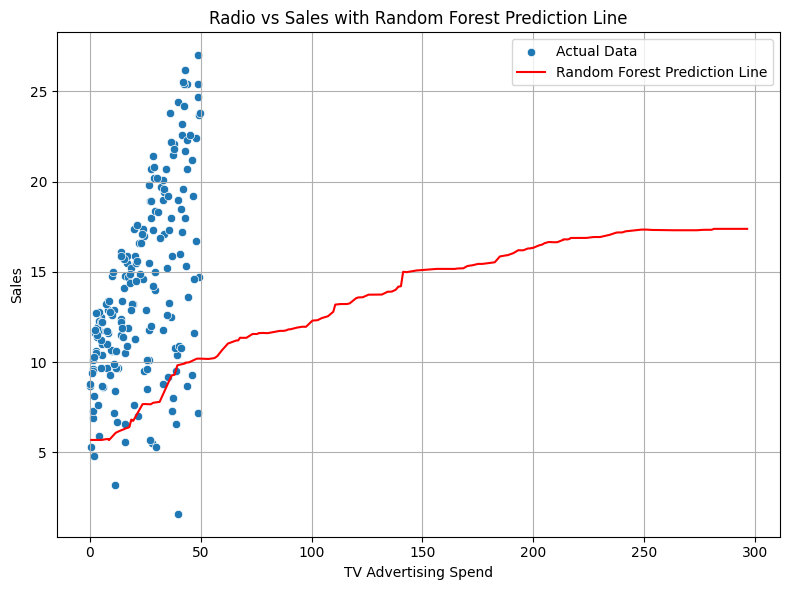

In [16]:
sorted_tv = np.sort(dataset['TV'].values)
radio_avg = dataset['Radio'].mean()
news_avg = dataset['Newspaper'].mean()

X_sorted = pd.DataFrame({
    'TV': sorted_tv,
    'Radio': radio_avg,
    'Newspaper': news_avg
})


sorted_predictions = rg.predict(X_sorted)


plt.figure(figsize=(8, 6))
sns.scatterplot(x='Radio', y='Sales', data=dataset, label='Actual Data')
plt.plot(sorted_tv, sorted_predictions, color='red', label='Random Forest Prediction Line')
plt.xlabel("TV Advertising Spend")
plt.ylabel("Sales")
plt.title("Radio vs Sales with Random Forest Prediction Line")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


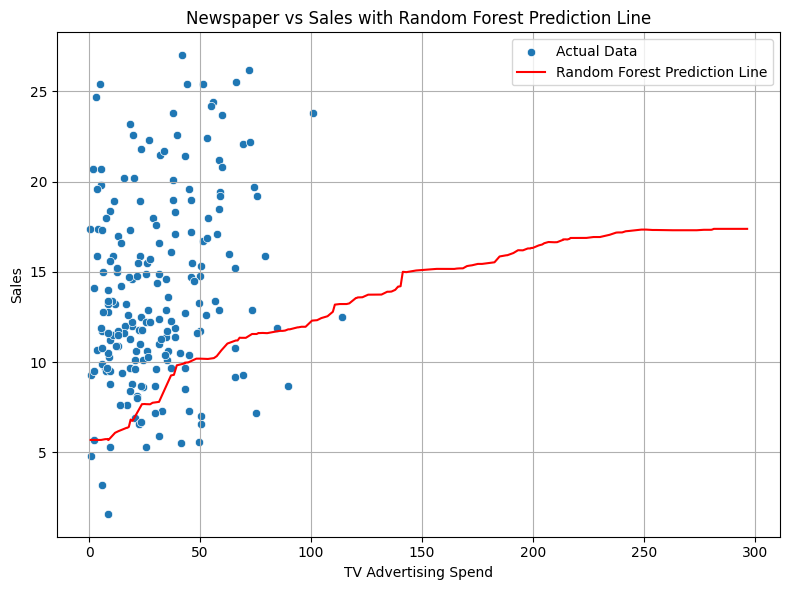

In [17]:
sorted_tv = np.sort(dataset['TV'].values)
radio_avg = dataset['Radio'].mean()
news_avg = dataset['Newspaper'].mean()

X_sorted = pd.DataFrame({
    'TV': sorted_tv,
    'Radio': radio_avg,
    'Newspaper': news_avg
})


sorted_predictions = rg.predict(X_sorted)


plt.figure(figsize=(8, 6))
sns.scatterplot(x="Newspaper", y='Sales', data=dataset, label='Actual Data')
plt.plot(sorted_tv, sorted_predictions, color='red', label='Random Forest Prediction Line')
plt.xlabel("TV Advertising Spend")
plt.ylabel("Sales")
plt.title("Newspaper vs Sales with Random Forest Prediction Line")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


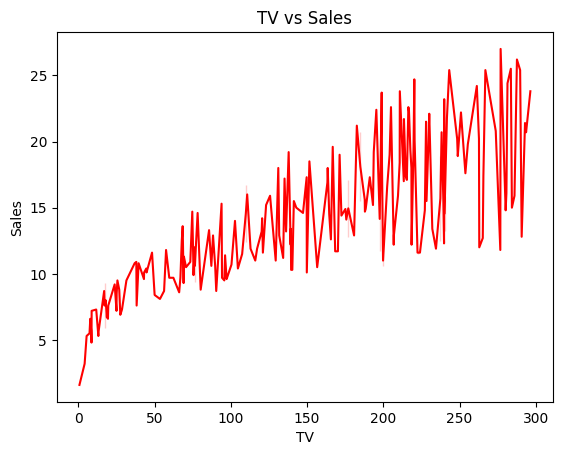

In [18]:
sns.lineplot(x="TV", y="Sales",data=dataset,color="r")
plt.title("TV vs Sales")
plt.show()


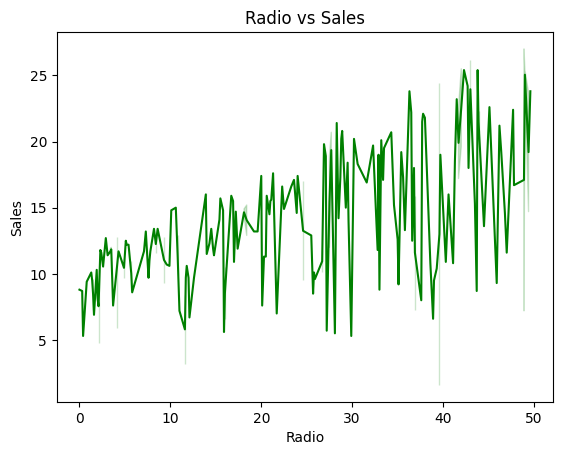

In [23]:
sns.lineplot(x="Radio", y="Sales",data=dataset,color="g")
plt.title("Radio vs Sales")
plt.show()


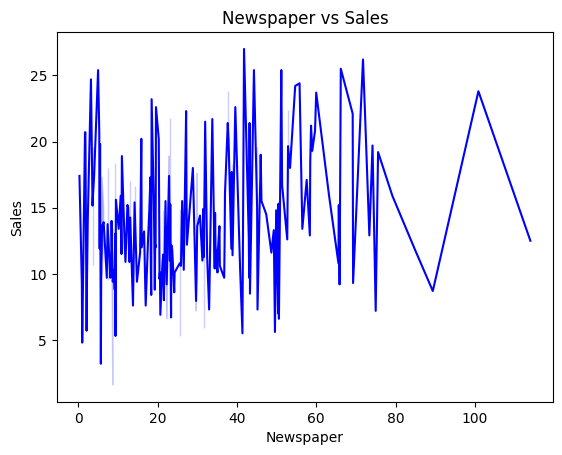

In [25]:
sns.lineplot(x="Newspaper", y="Sales",data=dataset,color="b")
plt.title("Newspaper vs Sales")
plt.show()


In [21]:
coefficients = pd.DataFrame(rg.feature_importances_, x.columns, columns=['Impact_on_Sales'])
coefficients.sort_values(by='Impact_on_Sales', ascending=False, inplace=True)
coefficients


,Impact_on_Sales
TV,0.603587
Radio,0.384682
Newspaper,0.011732


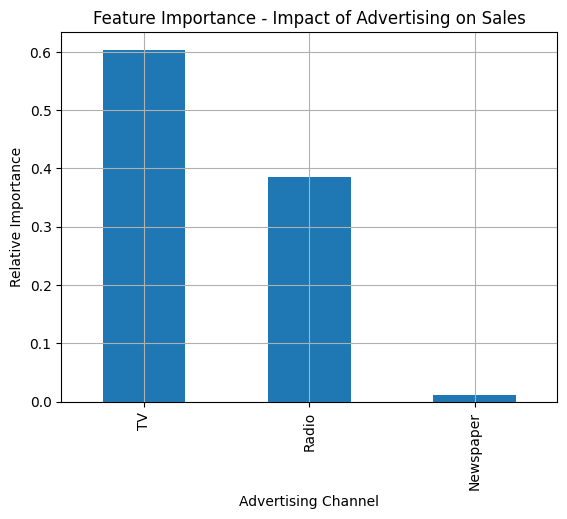

In [22]:
coefficients.plot(kind='bar', legend=False)
plt.title('Feature Importance - Impact of Advertising on Sales')
plt.ylabel('Relative Importance')
plt.xlabel('Advertising Channel')
plt.grid(True)
plt.show()


# 📊 Business Insights & Recommendations
## TV advertising shows the strongest positive correlation with sales, indicating it should remain a major budget focus.
## Radio advertising contributes positively but less than TV — consider optimizing content or targeting.
## Newspaper advertising has a smaller impact on sales, suggesting possible reallocation of funds.
## The R² score indicates the model explains a strong portion of sales variance, making it reliable for business decision support.
# 📝 Recommendation: Increase investment in high-performing channels (like TV), experiment with Radio targeting strategies, and assess ROI of Newspaper ads regularly.

